# Image Classification Model using CNN

### Problem Statement

Use CIFAR10 data (from [`keras.datasets.cifar10`](https://keras.io/api/datasets/cifar10/)) to build an image classification model using Convolutional Neural Network.

### Load and prepare data for modeling

In [1]:
# labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                'dog', 'frog', 'horse', 'ship', 'truck']

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = cifar10.load_data()

X_train_raw.shape, y_train_raw.shape, X_test_raw.shape, y_test_raw.shape

2023-03-17 17:22:20.326506: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-17 17:22:20.326554: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
# reshape the target labels into vector form
y_train_raw = y_train_raw.reshape(-1, )
y_test_raw = y_test_raw.reshape(-1, )

y_train_raw.shape, y_test_raw.shape

((50000,), (10000,))

In [4]:
# create dummies for the target labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_raw, 10)
y_test = to_categorical(y_test_raw, 10)

y_train.shape, y_test.shape

((50000, 10), (10000, 10))

In [5]:
# normalize the training data
from tensorflow.keras.utils import normalize

X_train = normalize(X_train_raw, axis=1)
X_test = normalize(X_test_raw, axis=1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

* Interesting link:
    * [What is the purpose of `keras utils normalize`?](https://stackoverflow.com/questions/52571752/what-is-the-purpose-of-keras-utils-normalize)

In [6]:
# sum of each column (number of images for each label)
y_train.sum(axis=0)

array([5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000.], dtype=float32)

For each lable (target value), we have equal number of records (5,000).

### Visualize data

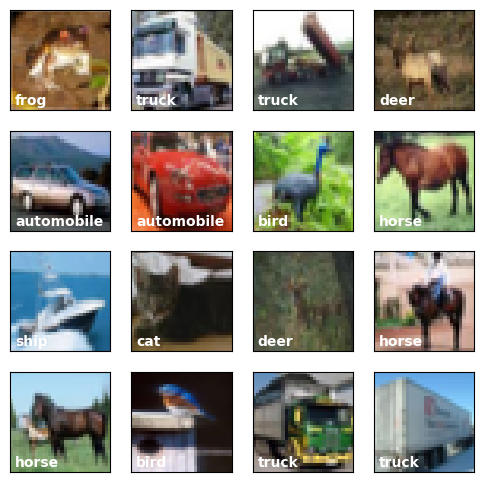

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, 
                         figsize=(6, 6),
                         subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train_raw[i])
    
    act = class_labels[y_train_raw[i]]
    ax.text(0.05, 0.05, act, color='white', fontsize=10,
            weight='semibold', transform=ax.transAxes)

plt.show();

### Build a NN model with hidden layers

Before we start, we need to take a small digression. The keras Neural Network model training results are not easily reproducible since it involves a lot of shuffling and random initializations. In order to maintain consitency, we will have to initialize some random seeds before every model run. We will create a function to do this.

In [8]:
from tensorflow import random as tf_random
import numpy as np
import random

def init_seeds(s):
    '''
    Initializes random seeds prior to model training 
    to ensure reproducibality of training results.
    '''
    tf_random.set_seed(s)
    np.random.seed(s)
    random.seed(s)

Let's build a NN model with three hidden layers.

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

# initialize seeds
init_seeds(314)

# prepare the model architecture
mlp1 = Sequential(
    [
        Flatten(input_shape=(32, 32, 3)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ], 
    name='mlp_3hidden')

mlp1.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

# fit and validate the model
mlp1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, shuffle=True);

2023-03-17 17:22:33.295125: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-17 17:22:33.295212: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-17 17:22:33.295387: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Derive): /proc/driver/nvidia/version does not exist
2023-03-17 17:22:33.295769: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0443 - accuracy: 0.2536 - val_loss: 1.9127 - val_accuracy: 0.3132
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8732 - accuracy: 0.3244 - val_loss: 1.8568 - val_accuracy: 0.3352
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7984 - accuracy: 0.3571 - val_loss: 1.7820 - val_accuracy: 0.3639
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7492 - accuracy: 0.3751 - val_loss: 1.7635 - val_accuracy: 0.3617
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7123 - accuracy: 0.3892 - val_loss: 1.7422 - val_accuracy: 0.3863
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6818 - accuracy: 0.4011 - val_loss: 1.6848 - val_accuracy: 0.3934
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6526 - accuracy: 0.4118 - val_loss: 1.6762 - val_accuracy

These results don't look very good. Let's try to add more neurons to the hidden nodes.

* Supplimentary Resource:
    * [Early-stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)    
* Interesting link:
    * [What is the difference between `sparse_categorical_crossentropy` and `categorical_crossentropy`?](https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c)

In [10]:
# initialize seeds
init_seeds(314)

mlp2 = Sequential(
    [
        Flatten(input_shape=(32, 32, 3)),
        Dense(1024, activation='relu'),
        Dense(1024, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ], 
    name='mlp_3hidden_v2')

mlp2.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

mlp2.fit(X_train, y_train, epochs=5, shuffle=True);

Epoch 1/5
1563/1563 [==============================] - 28s 18ms/step - loss: 2.1156 - accuracy: 0.2094
Epoch 2/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.9319 - accuracy: 0.2976
Epoch 3/5
1563/1563 [==============================] - 30s 19ms/step - loss: 1.8423 - accuracy: 0.3359
Epoch 4/5
1563/1563 [==============================] - 32s 20ms/step - loss: 1.7931 - accuracy: 0.3575
Epoch 5/5
1563/1563 [==============================] - 32s 20ms/step - loss: 1.7593 - accuracy: 0.3684


Again, the NN model is not able to achieve high accuracy. We could try more complicated models but there's a better way to improve the model --> CNN!

### Build a Convolutional Neural Network (CNN) model

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# initialize seeds
init_seeds(314)

cnn = Sequential(
    [
        Conv2D(filters=32, 
               kernel_size=(3, 3), 
               activation='relu', 
               input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ], 
    name='cnn')

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

cnn.fit(X_train, y_train, epochs=10, shuffle=True);

Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.6081 - accuracy: 0.4227
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2244 - accuracy: 0.5689
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0426 - accuracy: 0.6324
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9047 - accuracy: 0.6836
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7821 - accuracy: 0.7273
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6617 - accuracy: 0.7680
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.5421 - accuracy: 0.8108
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.4365 - accuracy: 0.8487
Epoch 9/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.3422 - accuracy: 0.8822
Epoch 10/10
1563/1563 [==============================] - 35s 23m

In [12]:
loss, accuracy = cnn.evaluate(X_test, y_test)
print(f'Loss: {loss:.2%}, Accuracy: {accuracy:.2%}')

313/313 [==============================] - 2s 7ms/step - loss: 1.6909 - accuracy: 0.6098
Loss: 169.09%, Accuracy: 60.98%


Further fine-tuning would improve the model accuracy. For now, let's proceed with this model.

* Reflections:
    * [How to avoid overfitting in Deep Learning Neural Networks?](https://machinelearningmastery.com/introduction-to-regularization-to-reduce-overfitting-and-improve-generalization-error/)
    * [Something that bothers me about deep neural nets.](https://www.johndcook.com/blog/2017/10/09/something-that-bothers-me-about-deep-neural-nets/)

In [13]:
# predicted probabilities for each class
probs = cnn.predict(X_test)
probs[:3]

array([[1.0005990e-06, 3.2590600e-07, 2.2493391e-06, 9.9729055e-01,
        3.4644509e-07, 1.5536642e-03, 1.1472543e-03, 1.5009330e-06,
        8.5600624e-07, 2.2405998e-06],
       [6.0061036e-05, 4.3695439e-02, 2.8584212e-12, 4.3223425e-09,
        3.2189281e-14, 2.8365988e-12, 2.3966577e-14, 5.8026005e-15,
        9.5598620e-01, 2.5825659e-04],
       [7.1008432e-01, 5.2420511e-03, 1.3434517e-03, 5.7596336e-03,
        7.1644672e-04, 1.0714782e-03, 2.0930642e-05, 7.8028864e-03,
        2.1358351e-01, 5.4375365e-02]], dtype=float32)

In [14]:
# grab the predictions (predicted labels) from the model
preds = [class_labels[np.argmax(p)] for p in probs]
preds[:3]

['cat', 'ship', 'airplane']

## Miscellaneous Items

### Visualize the predictions

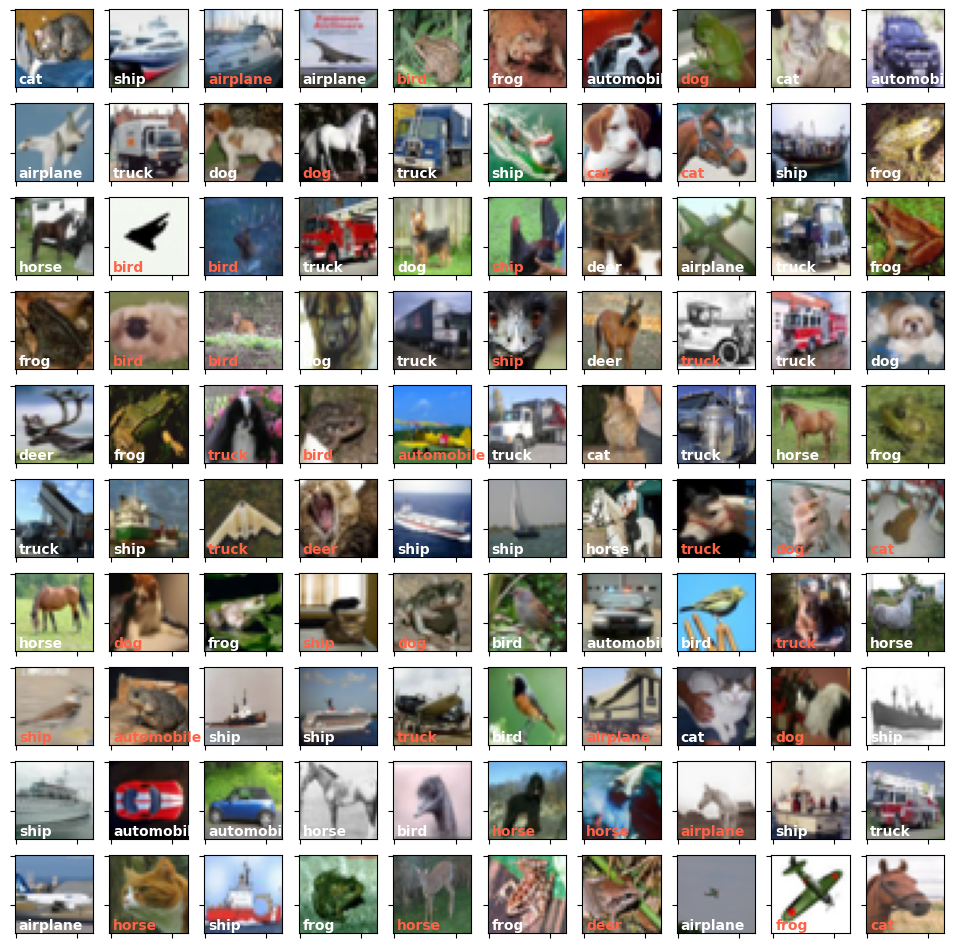

In [15]:
_, axes = plt.subplots(10, 10, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test_raw[i])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    pred = preds[i]
    act = class_labels[y_test_raw[i]]
    if pred == act:
        ax.text(0.05, 0.05, preds[i], color='white',
                weight='semibold', transform=ax.transAxes)
    else:
        ax.text(0.05, 0.05, preds[i], color='tomato',
                weight='semibold', transform=ax.transAxes)
plt.show();

## Exercises:

**Exercise 1:** Try different hyper-parameters to improve the model accuracy. 

**Exercise 2:** Capture the "history" of model fitting (i.e., the output of the `model.fit()` function) and plot (1) model accuracy, (2) validation accuracy, (3) model loss, and (4) validation loss, using `matplotlib`. (You can use `epoch` for the x-axis and put `accuracy` (or `loss`) on the y-axis.)